In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (9, 5)

In [3]:
sns.set()

## Learning curves with and without different masks at training

In [4]:
df_learning_curves = pd.read_csv('updnet_learning_curves.csv')

In [5]:
plt.figure()
sns.lineplot(data=df_learning_curves, x='n_samples', y='psnr', hue='fixed_masks')
plt.savefig('updnet_learning_curves.png')

<IPython.core.display.Javascript object>

## Denoising performance function of n params

In [17]:
df_n_params = pd.read_csv('n_params_model.csv', index_col=0)
# df_denoising_res = pd.read_csv('denoising_results_None.csv', index_col=0)
# df_denoising_res = pd.read_csv('denoising_results_5.csv', index_col=0)
df_denoising_res = pd.read_csv('denoising_results_None_compound_mssim.csv', index_col=0)
# df_denoising_res_didn = pd.read_csv('denoising_results_None_DIDN.csv', index_col=0)

In [18]:
# df_denoising_res[df_denoising_res['model_name'] == 'DIDN'] = df_denoising_res_didn.values

In [19]:
df_denoisers = df_denoising_res.merge(df_n_params, on=['model_name', 'model_size'])

In [20]:
df_denoisers['model_denomination'] = df_denoisers[['model_name', 'model_size']].agg('-'.join, axis=1)

<IPython.core.display.Javascript object>


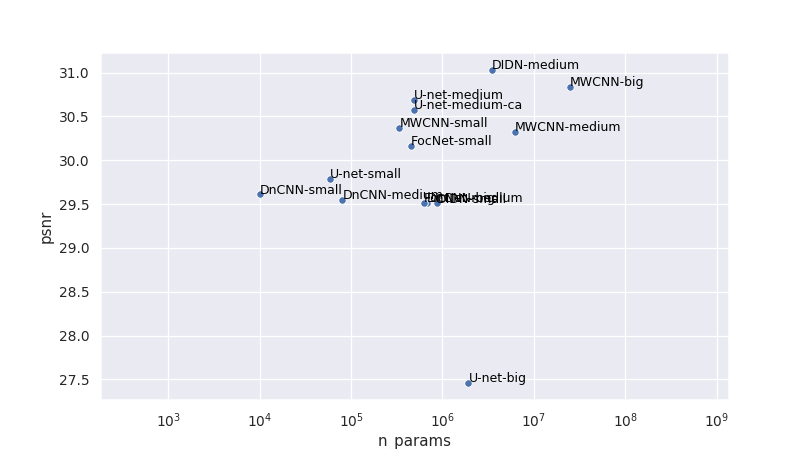

In [21]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='psnr', data=df_denoisers)
for line in range(0, df_denoisers.shape[0]):
    p.text(
        df_denoisers.n_params[line], 
        df_denoisers.psnr[line]+0.01, 
        df_denoisers.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

# Reconstruction performance function of denoising performance

In [31]:
df_reconstruction = pd.read_csv('reconstruction_results_None.csv', index_col=0)
# df_reconstruction = pd.read_csv('reconstruction_results_5.csv', index_col=0)
# df_reconstruction = pd.read_csv('reconstruction_results_af_2.csv', index_col=0)
# df_reconstruction_didn = pd.read_csv('reconstruction_results_None_DIDN.csv', index_col=0)
# df_reconstruction[df_reconstruction['model_name'] == 'DIDN'] = df_reconstruction_didn.values
df_reconstruction['psnr_recon'] = df_reconstruction['psnr']
df_reconstruction = df_reconstruction.drop('psnr', axis=1)
df_reconstruction['ssim_recon'] = df_reconstruction['ssim']
df_reconstruction = df_reconstruction.drop('ssim', axis=1)

In [32]:
df_all = df_denoisers.merge(df_reconstruction, on=['model_name', 'model_size'])

In [33]:
df_all

,model_name,model_size,psnr,ssim,n_params,model_denomination,psnr_recon,ssim_recon
0,DIDN,medium,31.034424,0.702162,3450848,DIDN-medium,35.181260,0.837218
1,DIDN,small,29.506435,0.633744,865264,DIDN-small,35.091831,0.835335
2,DnCNN,big,29.514429,0.648506,677450,DnCNN-big,34.947011,0.833006
3,DnCNN,medium,29.546841,0.680386,80362,DnCNN-medium,34.843274,0.831748
4,DnCNN,small,29.610102,0.659708,10154,DnCNN-small,34.413519,0.825539
5,FocNet,medium,29.509398,0.661846,621698,FocNet-medium,35.210394,0.837451
6,FocNet,small,30.159014,0.687850,455674,FocNet-small,35.047057,0.835027
7,MWCNN,big,30.833244,0.707568,24932746,MWCNN-big,35.235768,0.837658
8,MWCNN,medium,30.322081,0.683470,6217930,MWCNN-medium,35.110500,0.835500
9,MWCNN,small,30.364138,0.685203,338122,MWCNN-small,35.180771,0.836993


<IPython.core.display.Javascript object>


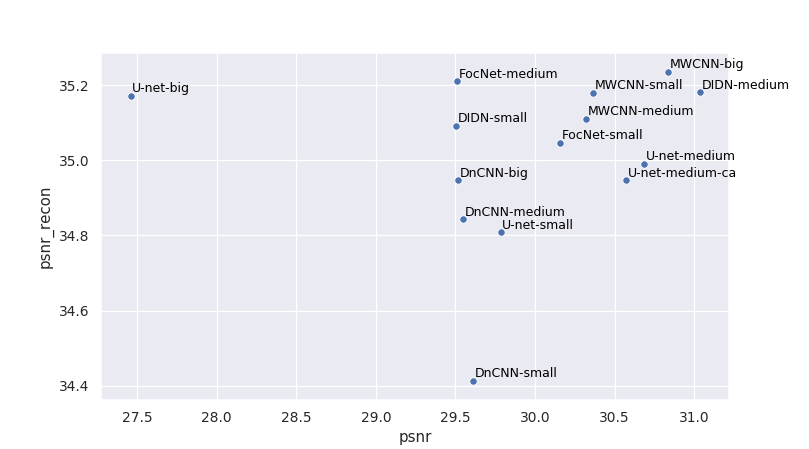

In [34]:
plt.figure()
p = sns.scatterplot(x='psnr', y='psnr_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.psnr[line]+0.01, 
        df_all.psnr_recon[line]+0.01, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

<IPython.core.display.Javascript object>


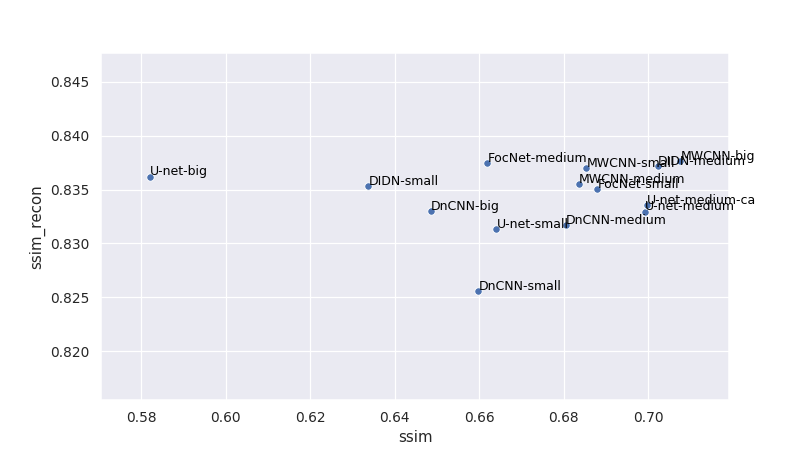

In [35]:
plt.figure()
p = sns.scatterplot(x='ssim', y='ssim_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.ssim[line]+0.0001, 
        df_all.ssim_recon[line]+0.0001, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

## Reconstruction perfoamce function of n params

In [ ]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='psnr_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.n_params[line], 
        df_all.psnr_recon[line]+0.01, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

In [ ]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='ssim_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.n_params[line], 
        df_all.ssim_recon[line]+0.0001, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

## Reconstruction performance at af 4 function of af 2

In [ ]:
df_reconstruction = pd.read_csv('reconstruction_results_None.csv', index_col=0)
df_reconstruction_af2 = pd.read_csv('reconstruction_results_af_2.csv', index_col=0)
df_reconstruction_af2['psnr_af2'] = df_reconstruction_af2['psnr']
df_reconstruction_af2 = df_reconstruction_af2.drop('psnr', axis=1)
df_reconstruction_af2['ssim_af2'] = df_reconstruction_af2['ssim']
df_reconstruction_af2 = df_reconstruction_af2.drop('ssim', axis=1)

In [ ]:
df_all_recon = df_reconstruction.merge(df_reconstruction_af2, on=['model_name', 'model_size'])
df_all_recon['model_denomination'] = df_all_recon[['model_name', 'model_size']].agg('-'.join, axis=1)

In [ ]:
df_all_recon

In [ ]:
plt.figure()
p = sns.scatterplot(x='psnr_af2', y='psnr', data=df_all_recon)
for line in range(0, df_all_recon.shape[0]):
    p.text(
        df_all_recon.psnr_af2[line]+0.01, 
        df_all_recon.psnr[line]+0.01, 
        df_all_recon.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

In [ ]:
plt.figure()
p = sns.scatterplot(x='ssim_af2', y='ssim', data=df_all_recon)
for line in range(0, df_all_recon.shape[0]):
    p.text(
        df_all_recon.ssim_af2[line]+0.0001, 
        df_all_recon.ssim[line]+0.0001, 
        df_all_recon.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )